In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as py
%matplotlib inline

In [2]:
pwd

'C:\\Users\\lenovo\\Documents\\Jupyter Projects\\Regression Models\\Simple Regression Models'

In [17]:
df=pd.read_csv('C:\\Users\\lenovo\\Documents\\Jupyter Projects\\Regression Models\\Telecust.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


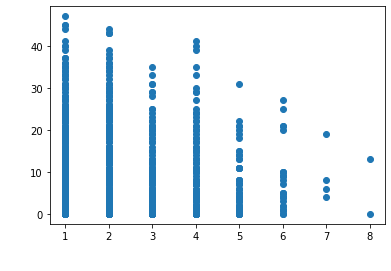

In [32]:
cdf=df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed','employ', 'retire', 'gender', 'reside', 'custcat']]
plt.scatter(cdf.reside,cdf.employ)
plt.xlabel("Reside",color='white',size=20)
plt.ylabel("Employ",color='white',size=20)
plt.show()

In [34]:
msk=np.random.rand(len(df))<0.3
train=df[msk]
test=df[~msk]

In [38]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
train_x=np.asanyarray(train[['reside']])
train_y=np.asanyarray(train[['employ']])
regr.fit(train_x,train_y)
print("The Coefficient is :",regr.coef_[0][0])
print("The Intercept is : ",regr.intercept_[0])

The Coefficient is : -0.5437926292879711
The Intercept is :  11.906618524218445


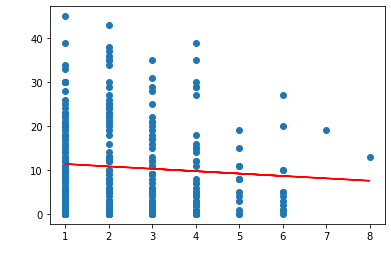

In [40]:
plt.scatter(train.reside,train.employ)
plt.plot(train_x,train_x*regr.coef_[0][0]+regr.intercept_[0],'-r')
plt.xlabel("Reside",color='white',size=20)
plt.ylabel("Employ",color='white',size=20)
plt.show()

In [46]:
from sklearn.metrics import r2_score
test_x=np.asanyarray(test[['reside']])
test_y=np.asanyarray(test[['employ']])
test_y_hat=regr.predict(test_x)
print("The MAE : %.2f " %np.mean(np.absolute(test_y_hat-test_y)))
print("The MSE  : %.2f "%np.mean((test_y_hat-test_y)**2))
print("The R2 Score : ",r2_score(test_y_hat,test_y))

The MAE : 7.89 
The MSE  : 99.50 
The R2 Score :  -163.1530945111432
